# Setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib_inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Data Cleaning and Preparation:

- Download the data
- Encode / Decode variables
- doing the train / validation / test split

In [2]:
!wget https://raw.githubusercontent.com/ziritrion/ml-zoomcamp/main/06_trees/CreditScoring.csv

--2023-02-12 15:32:58--  https://raw.githubusercontent.com/ziritrion/ml-zoomcamp/main/06_trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178,21K  --.-KB/s    in 0,08s   

2023-02-12 15:32:59 (2,08 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]



In [3]:
df = pd.read_csv('CreditScoring.csv')

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()

# Categorical variables are represented by numbers. For converting, we'll use the following map:

In [6]:
# replace numbers with strings in categorical values
# define the map dictionaries

status_values = {
    1: "ok", 
    2: "default", 
    0: "unk"
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}


# map the values of the dictionaries
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [7]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
# There are numbers that saved as 99999 while it is supposed to be missing so we first convert them to na:

In [10]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value= np.nan)

In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [12]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [13]:
# Since we only interested in ok or default values and unk is just one we simply remove it

df = df[df.status != 'unk'].reset_index(drop=True)

In [14]:
# Train, test split:

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [16]:
df_train = df_train.reset_index(drop='first')
df_val = df_val.reset_index(drop='first')
df_test = df_test.reset_index(drop='first')

In [17]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [18]:
del df_train['status']
del df_val['status']
del df_test['status']

In [19]:
df_full_train.shape, df_train.shape, df_test.shape

((3563, 14), (2672, 13), (891, 13))

# Decision trees:

- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [20]:
# Understanding how decision tree works basically:

def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [21]:
xi = df_train.iloc[0].to_dict()

In [22]:
assess_risk(xi)

'ok'

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [24]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [25]:
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [26]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)

In [27]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [28]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [30]:
y_pred = dt.predict_proba(X_val)[:,1]

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_val, y_pred)

0.6456431183550896

In [33]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [34]:
# Overfitting: Memorizing the data instead learning!
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [35]:
# Let's change a parameter of Decision Tree algoritm to shorten conditions:

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7761016984958594
val: 0.7389079944782155


In [37]:
# So by restricting tree to grow we overcome overfitting!

# Note:
- Decision stump is a Decision Tree, which uses only a single attribute for splitting!

In [38]:
# Let's visualize tree to see our conditions:

from sklearn.tree import export_text

In [39]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



# Decision tree learning algorithm:

- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [40]:
# sample data:

data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [41]:
df_example.sort_values(by='assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [42]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [43]:
from IPython.display import display

In [44]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [45]:
# Lets take an example :

T= [4000]

for T in T:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64



In [46]:
# From above we can conclude that if assets is > 4000 status will be 'ok':

# To understand how good our predictions are we can look at misclafication rate:

- Miclassification rate(IMPURITY): fraction of errors

# left dataframe:
- 3 'default', 1 'ok' >> default rate = %25

# right dataframe:
- 3 'ok', 1 'default' >> ok rate = %25

# So if we use T = 4000 We have not bad avg misclassification rate however we need to check on every T value that we have to find the best one!

In [47]:
# Let's add a new feature to our example data to see what it will look like!

In [48]:
# sample data(Version 2):

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets','debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [49]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [50]:
thresholds = {
    'assets' : [0, 2000, 3000, 4000, 5000, 8000],
    'debt' : [500, 1000, 2000]
}

In [51]:
for feature, Ts in thresholds.items():
    print('##################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.value_counts(normalize=True))
        
        print()
    print('##################')

##################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.285714
2000    1000  default    0.142857
3000    2000  default    0.142857
4000    1000  ok         0.142857
8000    3000  default    0.142857
9000    500   ok         0.142857
dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.333333
3000    2000  default    0.166667
4000    1000  ok         0.166667
8000    3000  default    0.166667
9000    500   ok         0.166667
dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


assets  debt  status 
5000    1000  ok         0.4
4000    1000  ok         0.2
8000    3000  default    0.2
9000    500   ok         0.2
dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


assets  debt  status 
5000    1000  ok         0.50
8000    3000  default    0.25
9000    500   ok         0.25
dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


assets  debt  status 
8000    3000  default    0.5
9000    500   ok         0.5
dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


assets  debt  status
9000    500   ok        1.0
dtype: float64

##################
##################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.285714
0       1000  default    0.142857
2000    1000  default    0.142857
3000    2000  default    0.142857
4000    1000  ok         0.142857
8000    3000  default    0.142857
dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


assets  debt  status 
3000    2000  default    0.5
8000    3000  default    0.5
dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


assets  debt  status 
8000    3000  default    1.0
dtype: float64

##################


# Finding the best split algorithm:

- For F in features:
    find all thresholds for F

- For T in threholds:
    split dataset using 'F>T' condition

- compute the impurity of this split then select the condition with the lowest impurity

# DECISION TREE LEARNING ALGORTIHM

- FIND THE BEST SPLIT

- STOP IF MAX_DEPTH IS REACHED

- IF LEFT IS SUFFICIENTLT LARGE AND NOT PURE:
     >REPEAT FOR LEFT
        
- IF RIGHT IS SUFFICIENTLT LARGE AND NOT PURE:
     >REPEAT FOR LEFT

# NOTE IMPORTANT!!:

- Sklearn uses Entropy but it is similar way to check impurity with Misclassification as well

# Decision trees parameter tuning

# These 2 parameter are the most important ones:

- selecting max_depth
- selecting min_samples_leaf

In [52]:
for d in [1,2,3,4,5,6,10,15,20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.746
  10 -> 0.700
  15 -> 0.666
  20 -> 0.661
None -> 0.657


In [53]:
# Now let's iterate over 2 parameters:

In [54]:
scores = []

for d in [4, 5, 6, 7, 8, 9, 10, 15]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf','auc'])
df_scores.reset_index(drop='first').sort_values(by='auc',ascending=False).head()

,max_depth,min_samples_leaf,auc
58,10,15,0.791429
49,9,15,0.788671
50,9,20,0.787296
67,15,15,0.786648
59,10,20,0.785646


In [55]:
df_score_pivot = df_scores.pivot_table(index='min_samples_leaf',
                                      columns=['max_depth'],
                                      values=['auc'])

In [56]:
df_score_pivot.round(3)

auc                                                 
max_depth            4      5      6      7      8      9      10     15
min_samples_leaf                                                        
1                 0.761  0.766  0.753  0.754  0.739  0.711  0.688  0.656
2                 0.761  0.766  0.753  0.759  0.753  0.729  0.714  0.687
5                 0.761  0.768  0.762  0.758  0.747  0.743  0.724  0.715
10                0.761  0.762  0.778  0.763  0.762  0.767  0.767  0.761
15                0.764  0.772  0.785  0.779  0.779  0.789  0.791  0.787
20                0.761  0.774  0.774  0.780  0.778  0.787  0.786  0.784
100               0.756  0.763  0.776  0.780  0.780  0.779  0.779  0.779
200               0.747  0.759  0.768  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680  0.680

In [57]:
import seaborn as sns

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

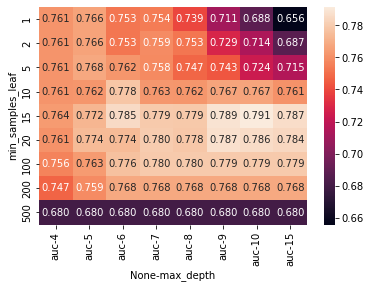

In [58]:
sns.heatmap(df_score_pivot, annot=True, fmt='.3f')

In [59]:
# Decision based on results:

In [60]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

# Ensemble and random forest

- Board of experts
- Ensembling model
- Random forest - ensembling decision trees
- Tuning random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [63]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [64]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [65]:
%%timeit
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

5.76 s ± 68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

ValueError: 2 columns passed, passed data had 3 columns

In [ ]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [ ]:
# 50 estimators is the optimum number!

In [68]:
#%%timeit

scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        #print(d)
        scores.append((d, n, auc))

In [69]:
columns=["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


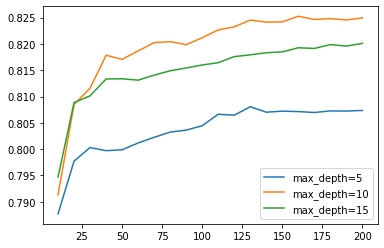

In [70]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
    
plt.legend();


In [71]:
max_depth = 10

In [72]:
scores = []

for s in [1, 3, 5, 10 ,50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        #print(d)
        scores.append((s, n, auc))

In [73]:
columns=["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [74]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

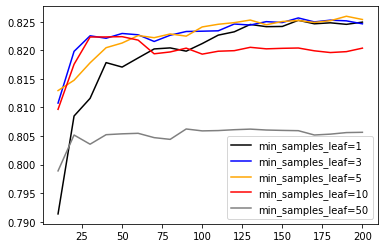

In [75]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col,
             label=f"min_samples_leaf={s}")
    
plt.legend();

In [76]:
min_samples_leaf = 3

In [77]:
# Final:

In [78]:
rf = RandomForestClassifier(n_estimators=n,
                           max_depth=max_depth,
                           min_samples_leaf=min_samples_leaf,
                           random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.8246258264512848


# Other useful parameters to check:

- max_features

- bootstrap

# Gradient boosting and XGBoost:

- Gradient boosting vs random forest

- Installing XGBoost

- Training the first model

- Performance monitoring

- Parsing xgboost's monitoring output

In [79]:
import xgboost as xgb

In [80]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [81]:
# ETA is a learning rate to decide how fast our model can learn:

In [82]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_chil_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity' :1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

[15:35:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_chil_weight" } are not used.



In [83]:
y_pred = model.predict(dval)

In [84]:
roc_auc_score(y_val, y_pred)

0.8003166549611296

In [85]:
watch_list = [(dtrain, 'train'),(dval, 'val')]

In [86]:
# Capture output uses to capture xgboost output!

In [87]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_chil_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watch_list)

In [88]:
?%%capture

In [89]:
def parse_xgb_output(output):
    
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
        
    return df_results

In [90]:
df_score = parse_xgb_output(output)

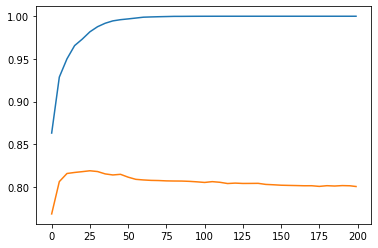

In [91]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='validation')

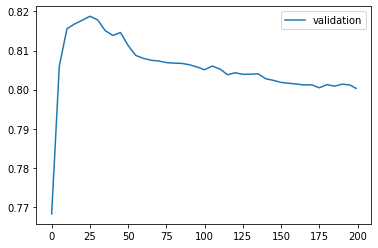

In [92]:
plt.plot(df_score.num_iter, df_score.val_auc, label='validation')
plt.legend()

# XGBoost parameter tuning

# Tuning the following parameters:

- eta

- max_depth

- min_child_weight

In [93]:
# Eta(learning rate, size of steps): It tells how much size we use weights of previous model()

In [94]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_chil_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watch_list)

In [95]:
scores = {}

In [96]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [97]:
scores.keys()

dict_keys(['eta=0.3'])

In [98]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

KeyError: 'eta=1.0'

In [99]:
scores = {}

In [100]:
# Tuning for max_Depth:

In [101]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_chil_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watch_list)

In [102]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [103]:
scores.keys()

dict_keys(['max_depth=6'])

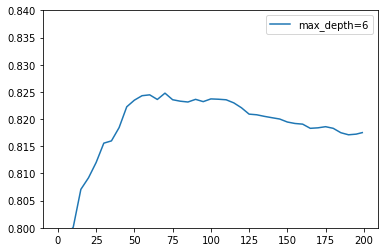

In [104]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
    
plt.ylim(0.8, 0.84)    
plt.legend()

In [106]:
# Tuning min_child_weight!

In [107]:
scores = {}

In [108]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                 evals=watch_list)

In [109]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [110]:
scores.keys()

dict_keys(['min_child_weight=1'])

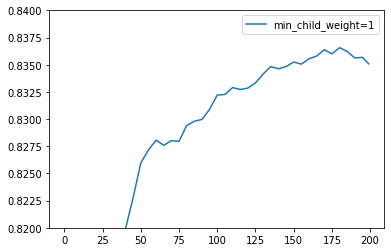

In [111]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
    
plt.ylim(0.82, 0.84)    
plt.legend()

In [112]:
# min_child_weight=30 is quite good!

In [113]:
watch_list

[(<xgboost.core.DMatrix at 0x7f888e6a61c0>, 'train'),
 (<xgboost.core.DMatrix at 0x7f888cf1efd0>, 'val')]

# Final XGBoost model:

In [114]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

# Selecting the final model

- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

In [115]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [116]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7850954203095104

In [117]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth=10,
                           min_samples_leaf=3,
                           random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [118]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [119]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [120]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [121]:
# Finalizing:

In [122]:
df_full_train = df_full_train.reset_index(drop=True)

In [123]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [124]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [125]:
del df_full_train['status']

In [126]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [127]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                   feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [143]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'eval_metric': 'auc',
    'seed': 1,
    'verbosity' :0,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [144]:
y_pred = model.predict(dtest)

In [145]:
roc_auc_score(y_test, y_pred)

0.8322662626460096

In [142]:
dfulltrain

In [131]:
# BentoMl:

!pip install bentoml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.5/946.5 kB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.9/377.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.6 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp38-cp38-macosx_10_9_x86_64.whl (192 kB)
  Using cached psutil-5.9.4-cp36-abi3-macosx_10_9_x86_64.whl (243 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
  Using cached aiohttp-3.8.3-cp38-cp38-macosx_10_9_x86_64.whl (359 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.1 MB/s eta 0:00:00
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31671 sha256=b385486ccf0db63d3a34bb3e7f428264098168f742e55d8ff45e33ed96ed9ea8
  Stored in directory: /Users/kenanarslanbay/Library/Caches/pip/wheels/9e/fc/1c/cf980e6413d3ee8e70cd8f39e2366b0f487e3e221aeb452eb0
Successfully built python-multipart
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    U

In [147]:
import bentoml

bentoml.xgboost.save_model("credit_risk_model", model,
                          custom_objects={
                              "DictVectorizer": dv
                          })

Model(tag="credit_risk_model:rekpkffk4g2xeohz", path="/Users/kenanarslanbay/bentoml/models/credit_risk_model/rekpkffk4g2xeohz/")

# Summary:

- Decision trees learn if-then rules from data

- Finding the best split: select the least impure split. This algorithm can overfit, that's why we control it by limiting the max depth and the size of group

- Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions

- Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting

In [136]:
fulltrain

NameError: name 'fulltrain' is not defined

In [141]:
df_full_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
1,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
2,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
4,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
3559,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
3560,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3561,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999
